# MI 2 SoSe22: Exercise sheet 1

### Exercise H1.1: PCA: 2-dimensional Toy Data

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### a)

In [169]:
def center(x):
    '''Returns centered vector'''
    x_centered = x - np.mean(x, axis = 0)
    return x_centered

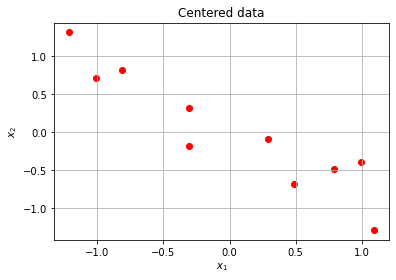

In [170]:
data = np.genfromtxt(fname='pca-data-2d.txt', delimiter='   ', dtype=np.float, skip_header = 0)
data_c = center(data).T



plt.scatter(data_c[0], data_c[1], marker = 'o', color = 'r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Centered data")
plt.grid()
plt.show()

##### b)

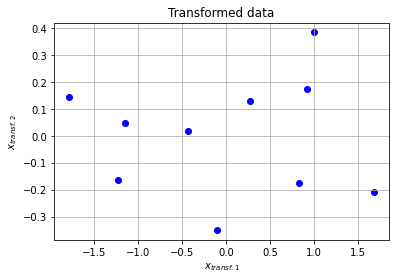

In [173]:
# Covariance and eigendecomposition
covariance = np.cov(data_c)
eig_value, eig_vector = np.linalg.eig(covariance)

# Sorts eigenvalues and eigenvectors
sorted_index = np.argsort(eig_value)[::-1] # from highest to lowest
eig_value_sorted = eig_value[sorted_index]
eig_vector_sorted = eig_vector[:, sorted_index]

# Transforms data
data_transf = np.dot(data_c.T, eig_vector_sorted)

# Plots

plt.scatter(data_transf[:,0], data_transf[:, 1], marker = 'o', color = 'b')
plt.xlabel('$x_{transf. 1}$')
plt.ylabel('$x_{transf. 2}$')
plt.title("Transformed data")
plt.grid()
plt.show()

##### c) 

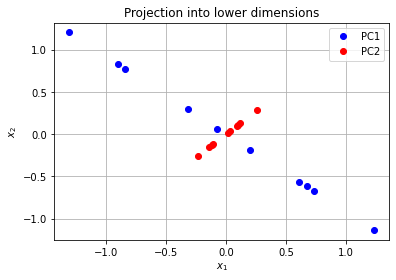

In [101]:
# Subspaces

e1 = eig_vector_sorted[:,0]
e2 = eig_vector_sorted[:,1]
a1 = np.dot(e1, data_c)
a2 = np.dot(e2, data_c)

plt.plot( a1*e1[0], a1*e1[1], 'bo', label = "PC1")
plt.plot( a2*e2[0], a2*e2[1], 'ro', label = "PC2")
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title("Projection into lower dimensions")
plt.grid()
plt.legend()
plt.show()

### Exercise H1.2: PCA: 3-dimensional Toy Data

##### a)

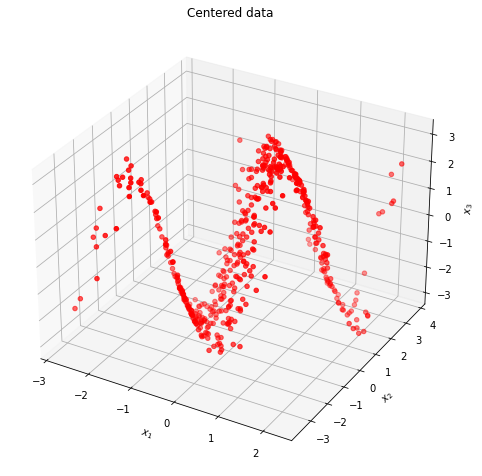

In [176]:
data3d = np.genfromtxt(fname='pca-data-3d.txt', delimiter=',', dtype=np.float, skip_header = 1)
data3d_c = center(data3d).T

fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(projection='3d')
ax.scatter(data3d_c[0], data3d_c[1], data3d_c[2], marker = 'o', color = 'r')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_title("Centered data")
plt.show()

##### b)

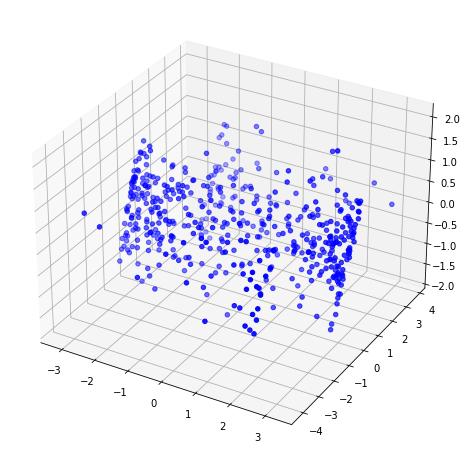

In [177]:
# Covariance and eigendecomposition
covariance = np.cov(data3d_c)
eig_value, eig_vector = np.linalg.eig(covariance)

# Sorts eigenvalues and eigenvectors
sorted_index = np.argsort(eig_value)[::-1] # from highest to lowest
eig_value_sorted = eig_value[sorted_index]
eig_vector_sorted = eig_vector[:, sorted_index]

# Transforms data
data3d_transf = np.dot(data3d_c.T, eig_vector_sorted)

# Plots

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data3d_transf[:,0], data3d_transf[:, 1], data3d_transf[:, 2], marker = 'o', color = 'b')
plt.grid()
plt.show()

##### c)

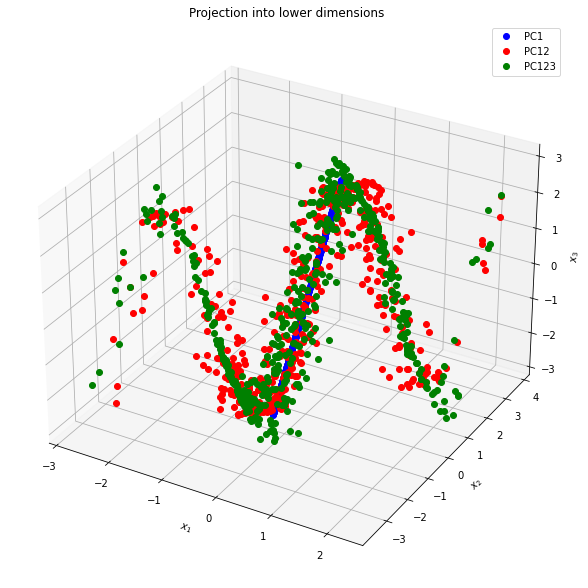

In [178]:
# Subspaces

e1 = eig_vector_sorted[:,0]
e2 = eig_vector_sorted[:,1]
e3 = eig_vector_sorted[:,2]
a1 = np.dot(e1, data3d_c)
a2 = np.dot(e2, data3d_c)
a3 = np.dot(e3, data3d_c)

fig = plt.figure(figsize=(10,16))
ax = fig.add_subplot(projection='3d')
ax.plot( a1*e1[0], a1*e1[1], a1*e1[2], 'bo', label = "PC1")
ax.plot( a1*e1[0] + a2*e2[0], a1*e1[1] + a2*e2[1], a1*e1[2] + a2*e2[2], 'ro', label = "PC12")
ax.plot( a1*e1[0] + a2*e2[0] + a3*e3[0], a1*e1[1] + a2*e2[1] + a3*e3[1], a1*e1[2] + a2*e2[2] + a3*e3[2], 'go', label = "PC123") # This is the same as plotting the entire data3d_c data
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$x_{3}$')
ax.set_title("Projection into lower dimensions")
plt.grid()
plt.legend()
plt.show()